# <html>

   

<div style="background-image: linear-gradient(to left, rgb(255, 255, 255), rgb(138, 136, 136)); width: auto; margin: 10px;">

  <img src="https://upload.wikimedia.org/wikipedia/en/thumb/f/fd/University_of_Tehran_logo.svg/225px-University_of_Tehran_logo.svg.png" width=100px width=auto style="padding:10px; vertical-align: center;">



</div>

   

<div   style:"text-align: center; background-image: linear-gradient(to left, rgb(255, 255, 255), rgb( 219, 204, 245  ));width: 400px; height: 30px; ">

<h1 style="font-family: Georgia; color: black; text-align: center; ">Course: NNDL </h1>



</div>

<div   style:"border: 3px solid green;text-align: center; ">

<h1 style="font-family: Georgia; color: black; text-align: center; ">Project2 - Question1 </h1>



</div>



   <div>    

<h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Mohammad Amanlou- sid:810100084 </h1>





</div>

   



</html>

###EDA

Number of images by class

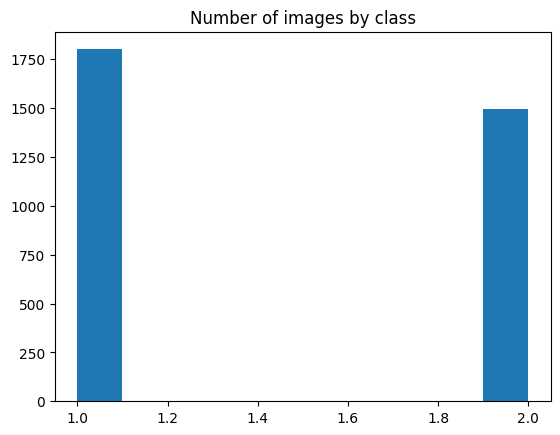

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os


os.chdir(r"/content/skin/benign")
x = os.listdir()
benign_images_number = len(x)

os.chdir(r"/content/skin/malignant")
y = os.listdir()
malignant_images_number = len(y)

# benign ------------> 1
# malignant ------------------> 2



z = []
for i in range(benign_images_number):
    z.append(1)
for i in range(malignant_images_number):
    z.append(2)
plt.hist(z)
plt.title('Number of images by class')
plt.show()


Benign Dimentions

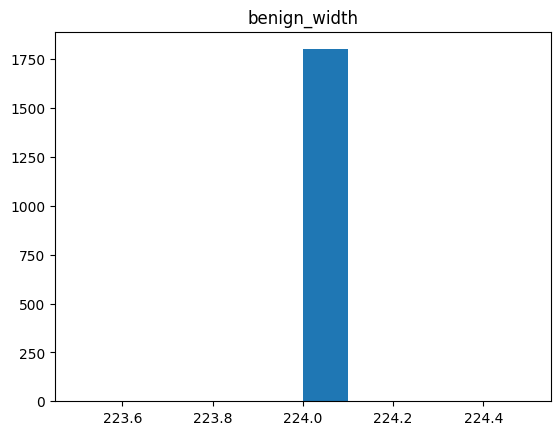

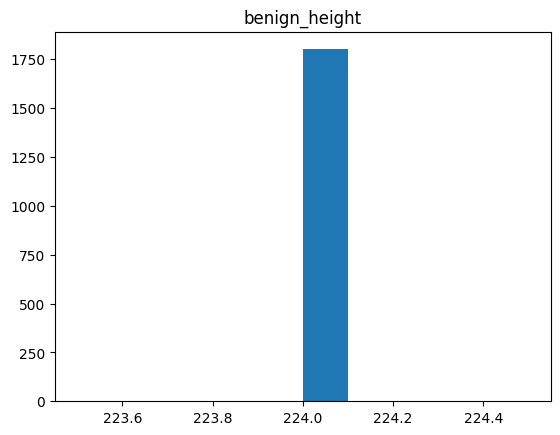

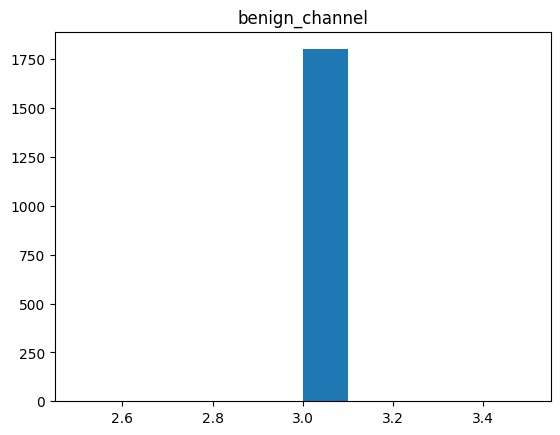

In [ ]:
width = []
height = []
channel = []

os.chdir(r"/content/skin/benign")
x = os.listdir()
for i in range(len(x)):
    w = cv2.imread(x[0])
    x1 = w.shape[0]
    x2 = w.shape[1]
    x3 = w.shape[2]

    width.append(x1)
    height.append(x2)
    channel.append(x3)
plt.hist(width)
plt.title('benign_width')
plt.show()
plt.hist(height)
plt.title('benign_height')
plt.show()
plt.hist(channel)
plt.title('benign_channel')
plt.show()


Malignant Dimentions

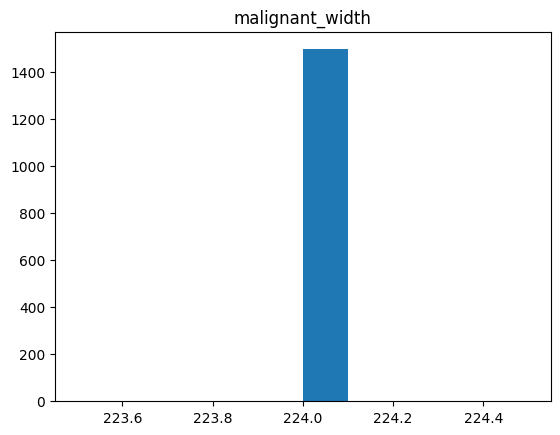

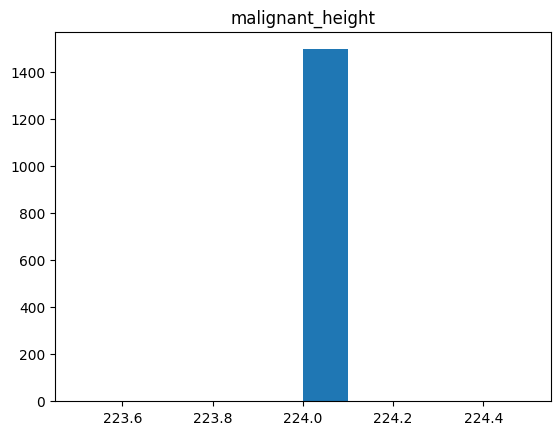

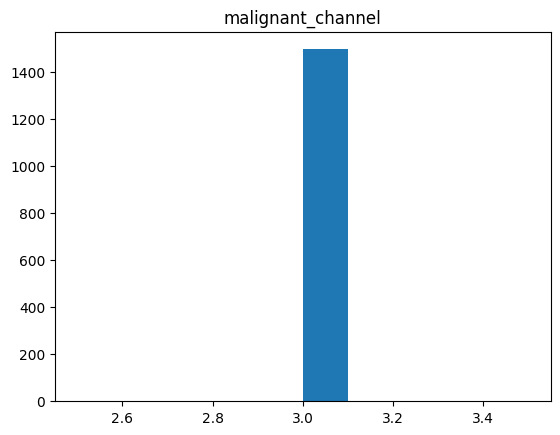

In [ ]:
width = []
height = []
channel = []

os.chdir(r"/content/skin/malignant")
x = os.listdir()
for i in range(len(x)):
    w = cv2.imread(x[0])
    x1 = w.shape[0]
    x2 = w.shape[1]
    x3 = w.shape[2]

    width.append(x1)
    height.append(x2)
    channel.append(x3)
plt.hist(width)
plt.title('malignant_width')
plt.show()
plt.hist(height)
plt.title('malignant_height')
plt.show()
plt.hist(channel)
plt.title('malignant_channel')
plt.show()


###َArticle CNN Model With no Augmentation, no Dropout. optimizer : Adam, Cross entropy loss Function

Importing Libraries

In [1]:
import torch
import torch.nn.functional as F
from torch import nn as nn
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import torchvision
import tensorflow as tf
from torchvision.datasets import ImageFolder

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
from PIL import Image
import cv2
import glob
import os
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from torchvision import datasets, transforms
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

Loading Dataset

In [20]:
x = '/content/skin/'
total_images = []
classes = os.listdir(x)
classes = classes[:2]
for i in classes:
  total_images += glob.glob(x + i + '/*.jpg')
print(total_images)



['/content/skin/benign/1061.jpg', '/content/skin/benign/0838.jpg', '/content/skin/benign/1105.jpg', '/content/skin/benign/0065.jpg', '/content/skin/benign/0353.jpg', '/content/skin/benign/1172.jpg', '/content/skin/benign/0471.jpg', '/content/skin/benign/0089.jpg', '/content/skin/benign/1184.jpg', '/content/skin/benign/0475.jpg', '/content/skin/benign/1727.jpg', '/content/skin/benign/0120.jpg', '/content/skin/benign/0094.jpg', '/content/skin/benign/1422.jpg', '/content/skin/benign/1680.jpg', '/content/skin/benign/0208.jpg', '/content/skin/benign/0066.jpg', '/content/skin/benign/0948.jpg', '/content/skin/benign/1265.jpg', '/content/skin/benign/0142.jpg', '/content/skin/benign/1364.jpg', '/content/skin/benign/0046.jpg', '/content/skin/benign/0932.jpg', '/content/skin/benign/1439.jpg', '/content/skin/benign/0583.jpg', '/content/skin/benign/1154.jpg', '/content/skin/benign/1741.jpg', '/content/skin/benign/1503.jpg', '/content/skin/benign/1007.jpg', '/content/skin/benign/0138.jpg', '/content

In [21]:
Transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean = 0.5, std = 0.5)])

In [22]:
rmdir /content/skin/.ipynb_checkpoints

rmdir: failed to remove '/content/skin/.ipynb_checkpoints': No such file or directory


In [23]:
total_dataset = datasets.ImageFolder(root=x, transform=Transforms)


train_size = int(0.7 * len(total_dataset))
val_size = int(0.15 * len(total_dataset))
test_size = len(total_dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(total_dataset, [train_size, val_size, test_size])


train_dataloader =DataLoader(dataset = train_dataset, batch_size = 32, shuffle = True)
val_dataloader =DataLoader(dataset = val_dataset, batch_size = 32, shuffle = True)
test_dataloader =DataLoader(dataset = test_dataset, batch_size = 32, shuffle = True)

Network Structure

In [24]:
class CNN_Model(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()

        self.CNN_block = nn.Sequential(
            nn.Conv2d(3, 16, 3, 8, 0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
            nn.Conv2d(16, 32, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
            nn.Conv2d(32, 64, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=1),
            nn.Conv2d(64, 128, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512, 64),
            nn.Linear(64, 32),
            nn.Linear(32, 2),
        )

    def forward(self, x: torch.Tensor):
        x = self.CNN_block(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x


In [25]:
model = CNN_Model(input_shape=3, hidden_units=16, output_shape=2)
model

CNN_Model(
  (CNN_block): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(8, 8))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
    (9): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=512, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): Linear(in_features=32, out_features=2, bias=True)
  )
)

In [26]:
z = torch.randn(1,3, 224, 224)
model(z).shape

torch.Size([1, 2])

TRAINING

In [27]:
def train_step(model,
               data_loader,
               loss_fn,
               optimizer,
               accuracy_fn,
               device):

    # Send model to GPU
    model.to(device)
    train_loss, train_acc, counter = 0, 0, 0
    with tqdm(data_loader, desc ="  train") as train_tqdm:
        for X, y in train_tqdm:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            y_pred = model(X)

            # 2. Calculate loss
            loss = loss_fn(y_pred, y)
            train_loss += loss
            train_acc += accuracy_fn(true=y.cpu(),
                                     pred=y_pred.cpu())
            counter += 1
            train_tqdm.set_postfix(train_acc=train_acc/counter, train_loss=train_loss.item()/counter, refresh=True)

            # 3. Optimizer zero grad
            optimizer.zero_grad()

            # 4. Loss backward
            loss.backward()

            # 5. Optimizer step
            optimizer.step()

        # Calculate loss and accuracy per epoch and print out what's happening
        train_loss /= len(data_loader)
        train_acc /= len(data_loader)

    return train_loss.item(), train_acc


In [28]:
def test_step(model,
              data_loader,
              loss_fn,
              accuracy_fn,
              device):

    # Send model to GPU
    model.to(device)

    # put model in eval mode
    model.eval()
    test_loss, test_acc, counter = 0, 0, 0
    with tqdm(data_loader, desc ="   test") as test_tqdm:
        for X, y in test_tqdm:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(true=y.cpu(),
                                    pred=test_pred.cpu())
            counter += 1
            test_tqdm.set_postfix(train_acc=test_acc/counter, train_loss=test_loss.item()/counter, refresh=True)

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc  /= len(data_loader)

    return test_loss.item(), test_acc

In [29]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
def accuracy_fn(true, pred):
    pred = F.softmax(pred, dim = 1)
    true = torch.zeros(pred.shape[0], pred.shape[1]).scatter_(1, true.unsqueeze(1), 1.)
    acc = (true.argmax(-1) == pred.argmax(-1)).float().detach().numpy()
    acc = float((100 * acc.sum()) / len(acc))
    return round(acc, 4)

In [30]:
from timeit import default_timer as timer

train_epoch_loss = []
train_epoch_accuracy = []
val_epoch_loss = []
val_epoch_accuracy = []
test_epoch_loss = []
test_epoch_accuracy = []
train_time_start = timer()
early_stop = 0
epochs = 100
for epoch in range(epochs):
  print("EPOCH {}/{} :".format(epoch +1, epochs))
  train_loss, train_acc = train_step(data_loader=train_dataloader,
                                              model=model,
                                              loss_fn=loss_fn,
                                              optimizer=optimizer,
                                              accuracy_fn=accuracy_fn,
                                              device=device
                                              )
  test_loss, test_acc = test_step(data_loader=val_dataloader,
                                    model=model,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn,
                                    device=device
                                    )

  train_epoch_loss.append(train_loss)
  train_epoch_accuracy.append(train_acc)
  val_epoch_loss.append(test_loss)
  val_epoch_accuracy.append(test_acc)
  if test_loss <= min(val_epoch_loss):
    early_stop = 0
  else:
    early_stop +=1
    if early_stop == 8:
      break
train_time_end = timer()
total_time = train_time_end - train_time_start
print(f"\n\nTrain time: {total_time:.3f} seconds")

EPOCH 1/100 :


   test: 100%|██████████| 16/16 [00:01<00:00, 12.03it/s, train_acc=59.2, train_loss=0.646]


EPOCH 2/100 :


   test: 100%|██████████| 16/16 [00:01<00:00,  8.68it/s, train_acc=72, train_loss=0.527]


EPOCH 3/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  6.19it/s, train_acc=76.6, train_loss=0.482]


EPOCH 4/100 :


   test: 100%|██████████| 16/16 [00:01<00:00, 13.44it/s, train_acc=79.2, train_loss=0.429]


EPOCH 5/100 :


   test: 100%|██████████| 16/16 [00:01<00:00,  8.57it/s, train_acc=77.3, train_loss=0.457]


EPOCH 6/100 :


   test: 100%|██████████| 16/16 [00:01<00:00, 12.52it/s, train_acc=81.5, train_loss=0.41]


EPOCH 7/100 :


   test: 100%|██████████| 16/16 [00:01<00:00, 13.16it/s, train_acc=79.6, train_loss=0.41]


EPOCH 8/100 :


   test: 100%|██████████| 16/16 [00:01<00:00,  9.71it/s, train_acc=80.2, train_loss=0.406]


EPOCH 9/100 :


   test: 100%|██████████| 16/16 [00:01<00:00, 13.39it/s, train_acc=80.4, train_loss=0.401]


EPOCH 10/100 :


   test: 100%|██████████| 16/16 [00:01<00:00, 13.11it/s, train_acc=80.4, train_loss=0.391]


EPOCH 11/100 :


   test: 100%|██████████| 16/16 [00:01<00:00, 11.75it/s, train_acc=82.2, train_loss=0.392]


EPOCH 12/100 :


   test: 100%|██████████| 16/16 [00:01<00:00, 12.62it/s, train_acc=81.1, train_loss=0.385]


EPOCH 13/100 :


   test: 100%|██████████| 16/16 [00:01<00:00, 13.06it/s, train_acc=78.9, train_loss=0.433]


EPOCH 14/100 :


   test: 100%|██████████| 16/16 [00:01<00:00, 10.80it/s, train_acc=77.8, train_loss=0.44]


EPOCH 15/100 :


   test: 100%|██████████| 16/16 [00:01<00:00, 13.28it/s, train_acc=78.9, train_loss=0.401]


EPOCH 16/100 :


   test: 100%|██████████| 16/16 [00:01<00:00, 12.55it/s, train_acc=82.6, train_loss=0.378]


EPOCH 17/100 :


   test: 100%|██████████| 16/16 [00:01<00:00, 11.26it/s, train_acc=81.9, train_loss=0.385]


EPOCH 18/100 :


   test: 100%|██████████| 16/16 [00:01<00:00, 13.11it/s, train_acc=81, train_loss=0.394]


EPOCH 19/100 :


   test: 100%|██████████| 16/16 [00:01<00:00, 12.08it/s, train_acc=79.4, train_loss=0.392]


EPOCH 20/100 :


   test: 100%|██████████| 16/16 [00:01<00:00, 13.33it/s, train_acc=79.5, train_loss=0.406]


EPOCH 21/100 :


   test: 100%|██████████| 16/16 [00:01<00:00, 13.48it/s, train_acc=80.8, train_loss=0.372]


EPOCH 22/100 :


   test: 100%|██████████| 16/16 [00:01<00:00,  9.57it/s, train_acc=83.5, train_loss=0.377]


EPOCH 23/100 :


   test: 100%|██████████| 16/16 [00:01<00:00, 13.16it/s, train_acc=79.8, train_loss=0.409]


EPOCH 24/100 :


   test: 100%|██████████| 16/16 [00:01<00:00, 13.14it/s, train_acc=82.8, train_loss=0.374]


EPOCH 25/100 :


   test: 100%|██████████| 16/16 [00:01<00:00, 10.18it/s, train_acc=82.3, train_loss=0.391]


EPOCH 26/100 :


   test: 100%|██████████| 16/16 [00:01<00:00, 12.58it/s, train_acc=81.1, train_loss=0.4]


EPOCH 27/100 :


   test: 100%|██████████| 16/16 [00:01<00:00, 12.52it/s, train_acc=79, train_loss=0.388]


EPOCH 28/100 :


   test: 100%|██████████| 16/16 [00:01<00:00,  9.64it/s, train_acc=79.2, train_loss=0.427]


EPOCH 29/100 :


   test: 100%|██████████| 16/16 [00:01<00:00, 13.43it/s, train_acc=79.5, train_loss=0.402]



Train time: 271.338 seconds


In [31]:
torch.save(model.state_dict(), 'saved_model')

   test: 100%|██████████| 16/16 [00:01<00:00,  9.77it/s]


In [32]:
x = train_epoch_loss
y = val_epoch_loss


In [33]:
m = train_epoch_accuracy
n = val_epoch_accuracy


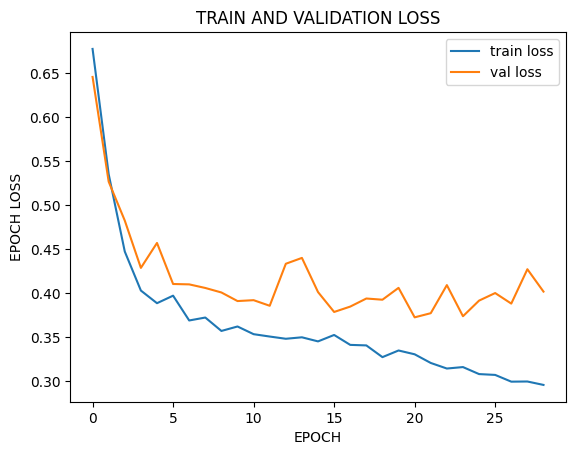

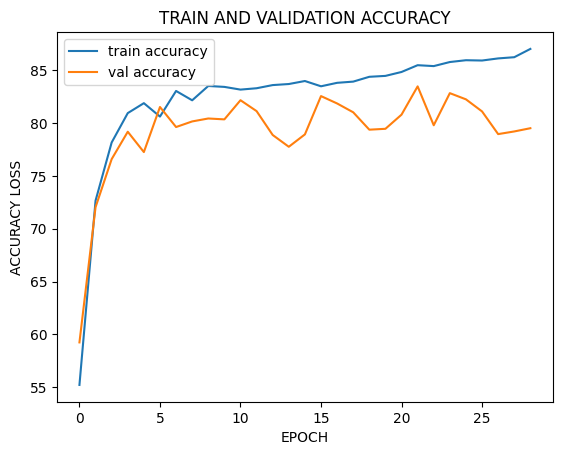

In [34]:
plt.plot(x, label='train loss')
plt.plot(y, label='val loss')
plt.xlabel('EPOCH')
plt.ylabel('EPOCH LOSS')
plt.title('TRAIN AND VALIDATION LOSS')
plt.legend()
plt.show()
plt.plot(m, label='train accuracy')
plt.plot(n, label='val accuracy')
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY LOSS')
plt.title('TRAIN AND VALIDATION ACCURACY')
plt.legend()
plt.show()

In [38]:
test_loss, test_acc = test_step(data_loader=test_dataloader,
                                    model=model,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn,
                                    device=device
                                    )
print(test_loss)
print(test_acc)

   test: 100%|██████████| 16/16 [00:01<00:00, 11.70it/s, train_acc=79.1, train_loss=0.397]

0.39680585265159607
79.1015625



Classification Report:
              precision    recall  f1-score   support

      benign       0.92      0.78      0.85       252
   malignant       0.80      0.93      0.86       242

    accuracy                           0.85       494
   macro avg       0.86      0.86      0.85       494
weighted avg       0.86      0.85      0.85       494



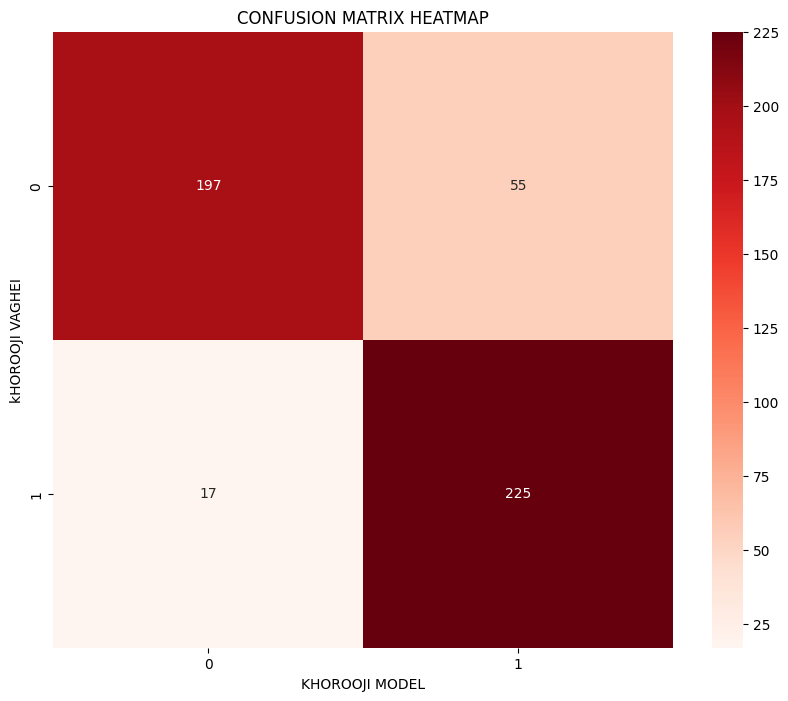

In [71]:
print("\nClassification Report:")
y_true, y_pred = [], []
with torch.no_grad():
    for inputs, labels in val_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

print(classification_report(y_true, y_pred, target_names=train_dataloader.dataset.dataset.classes))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=range(2), yticklabels=range(2))
plt.xlabel('KHOROOJI MODEL')
plt.ylabel('kHOROOJI VAGHEI')
plt.title('CONFUSION MATRIX HEATMAP')
plt.show()


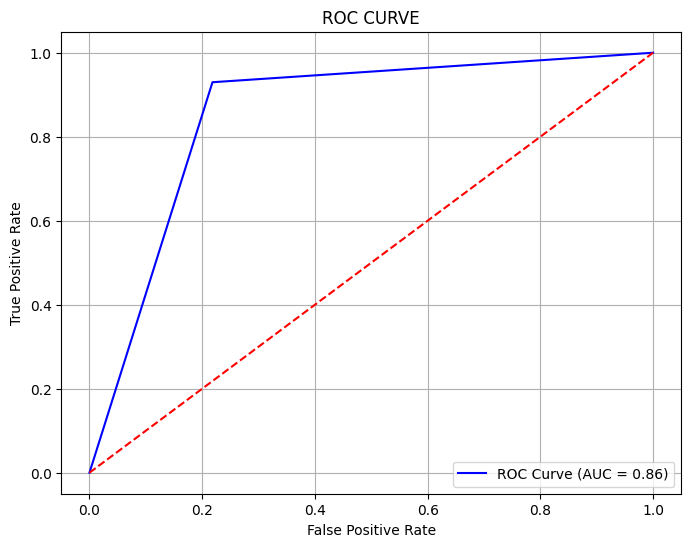

In [88]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

###َArticle CNN Model With Augmentation and Dropout. optimizer : Adam, Cross entropy loss Function

In [192]:
x = '/content/skin/'
total_images = []
classes = os.listdir(x)
classes = classes[:2]
for i in classes:
  total_images += glob.glob(x + i + '/*.jpg')
print(total_images)


['/content/skin/benign/1061.jpg', '/content/skin/benign/0838.jpg', '/content/skin/benign/1105.jpg', '/content/skin/benign/0065.jpg', '/content/skin/benign/0353.jpg', '/content/skin/benign/1172.jpg', '/content/skin/benign/0471.jpg', '/content/skin/benign/0089.jpg', '/content/skin/benign/1184.jpg', '/content/skin/benign/0475.jpg', '/content/skin/benign/1727.jpg', '/content/skin/benign/0120.jpg', '/content/skin/benign/0094.jpg', '/content/skin/benign/1422.jpg', '/content/skin/benign/1680.jpg', '/content/skin/benign/0208.jpg', '/content/skin/benign/0066.jpg', '/content/skin/benign/0948.jpg', '/content/skin/benign/1265.jpg', '/content/skin/benign/0142.jpg', '/content/skin/benign/1364.jpg', '/content/skin/benign/0046.jpg', '/content/skin/benign/0932.jpg', '/content/skin/benign/1439.jpg', '/content/skin/benign/0583.jpg', '/content/skin/benign/1154.jpg', '/content/skin/benign/1741.jpg', '/content/skin/benign/1503.jpg', '/content/skin/benign/1007.jpg', '/content/skin/benign/0138.jpg', '/content

In [193]:
Transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomAffine(degrees=0, scale=(0.8, 1.2)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean = 0.5, std = 0.5)])

In [194]:
total_dataset = datasets.ImageFolder(root=x, transform=Transforms)


train_size = int(0.7 * len(total_dataset))
val_size = int(0.15 * len(total_dataset))
test_size = len(total_dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(total_dataset, [train_size, val_size, test_size])


train_dataloader =DataLoader(dataset = train_dataset, batch_size = 32, shuffle = True)
val_dataloader =DataLoader(dataset = val_dataset, batch_size = 32, shuffle = True)
test_dataloader =DataLoader(dataset = test_dataset, batch_size = 32, shuffle = True)

In [195]:
class CNN_Model(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()

        self.CNN_block = nn.Sequential(
            nn.Conv2d(3, 16, 3, 8, 0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
            nn.Conv2d(16, 32, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
            nn.Conv2d(32, 64, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=1),
            nn.Conv2d(64, 128, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512, 64),
            nn.Dropout(0.4),
            nn.Linear(64, 32),
            nn.Dropout(0.4),
            nn.Linear(32, 2))

    def forward(self, x: torch.Tensor):
        x = self.CNN_block(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x


In [196]:
model = CNN_Model(input_shape=3, hidden_units=16, output_shape=2)
model

CNN_Model(
  (CNN_block): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(8, 8))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
    (9): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=512, out_features=64, bias=True)
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): Dropout(p=0.4, inplace=False)
   

In [197]:
def train_step(model,
               data_loader,
               loss_fn,
               optimizer,
               accuracy_fn,
               device):

    # Send model to GPU
    model.to(device)
    train_loss, train_acc, counter = 0, 0, 0
    with tqdm(data_loader, desc ="  train") as train_tqdm:
        for X, y in train_tqdm:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            y_pred = model(X)

            # 2. Calculate loss
            loss = loss_fn(y_pred, y)
            train_loss += loss
            train_acc += accuracy_fn(true=y.cpu(),
                                     pred=y_pred.cpu())
            counter += 1
            train_tqdm.set_postfix(train_acc=train_acc/counter, train_loss=train_loss.item()/counter, refresh=True)

            # 3. Optimizer zero grad
            optimizer.zero_grad()

            # 4. Loss backward
            loss.backward()

            # 5. Optimizer step
            optimizer.step()

        # Calculate loss and accuracy per epoch and print out what's happening
        train_loss /= len(data_loader)
        train_acc /= len(data_loader)

    return train_loss.item(), train_acc


In [198]:
def test_step(model,
              data_loader,
              loss_fn,
              accuracy_fn,
              device):

    # Send model to GPU
    model.to(device)

    # put model in eval mode
    model.eval()
    test_loss, test_acc, counter = 0, 0, 0
    with tqdm(data_loader, desc ="   test") as test_tqdm:
        for X, y in test_tqdm:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(true=y.cpu(),
                                    pred=test_pred.cpu())
            counter += 1
            test_tqdm.set_postfix(train_acc=test_acc/counter, train_loss=test_loss.item()/counter, refresh=True)

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc  /= len(data_loader)

    return test_loss.item(), test_acc

In [199]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
def accuracy_fn(true, pred):
    pred = F.softmax(pred, dim = 1)
    true = torch.zeros(pred.shape[0], pred.shape[1]).scatter_(1, true.unsqueeze(1), 1.)
    acc = (true.argmax(-1) == pred.argmax(-1)).float().detach().numpy()
    acc = float((100 * acc.sum()) / len(acc))
    return round(acc, 4)

In [200]:
from timeit import default_timer as timer

train_epoch_loss = []
train_epoch_accuracy = []
val_epoch_loss = []
val_epoch_accuracy = []
test_epoch_loss = []
test_epoch_accuracy = []
train_time_start = timer()
early_stop = 0
epochs = 100
for epoch in range(epochs):
  print("EPOCH {}/{} :".format(epoch +1, epochs))
  train_loss, train_acc = train_step(data_loader=train_dataloader,
                                              model=model,
                                              loss_fn=loss_fn,
                                              optimizer=optimizer,
                                              accuracy_fn=accuracy_fn,
                                              device=device
                                              )
  test_loss, test_acc = test_step(data_loader=val_dataloader,
                                    model=model,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn,
                                    device=device
                                    )

  train_epoch_loss.append(train_loss)
  train_epoch_accuracy.append(train_acc)
  val_epoch_loss.append(test_loss)
  val_epoch_accuracy.append(test_acc)
  if test_loss <= min(val_epoch_loss):
    early_stop = 0
  else:
    early_stop +=1
    if early_stop == 6:
      break
train_time_end = timer()
total_time = train_time_end - train_time_start
print(f"\n\nTrain time: {total_time:.3f} seconds")

EPOCH 1/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  5.04it/s, train_acc=51.3, train_loss=0.689]


EPOCH 2/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.37it/s, train_acc=60.6, train_loss=0.618]


EPOCH 3/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.33it/s, train_acc=76.4, train_loss=0.492]


EPOCH 4/100 :


   test: 100%|██████████| 16/16 [00:05<00:00,  3.19it/s, train_acc=76.9, train_loss=0.495]


EPOCH 5/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  5.17it/s, train_acc=73.9, train_loss=0.494]


EPOCH 6/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  5.09it/s, train_acc=79.8, train_loss=0.44]


EPOCH 7/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  5.26it/s, train_acc=80, train_loss=0.431]


EPOCH 8/100 :


   test: 100%|██████████| 16/16 [00:05<00:00,  3.19it/s, train_acc=79.5, train_loss=0.449]


EPOCH 9/100 :


   test: 100%|██████████| 16/16 [00:04<00:00,  3.97it/s, train_acc=79.4, train_loss=0.418]


EPOCH 10/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.51it/s, train_acc=78.7, train_loss=0.429]


EPOCH 11/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.43it/s, train_acc=81.5, train_loss=0.399]


EPOCH 12/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  5.23it/s, train_acc=82.3, train_loss=0.403]


EPOCH 13/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.31it/s, train_acc=81.6, train_loss=0.393]


EPOCH 14/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.01it/s, train_acc=80.6, train_loss=0.423]


EPOCH 15/100 :


   test: 100%|██████████| 16/16 [00:04<00:00,  3.94it/s, train_acc=84.2, train_loss=0.374]


EPOCH 16/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.52it/s, train_acc=84.5, train_loss=0.358]


EPOCH 17/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.99it/s, train_acc=84.1, train_loss=0.362]


EPOCH 18/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  5.33it/s, train_acc=82.7, train_loss=0.343]


EPOCH 19/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  5.28it/s, train_acc=81.7, train_loss=0.377]


EPOCH 20/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.34it/s, train_acc=83.7, train_loss=0.357]


EPOCH 21/100 :


   test: 100%|██████████| 16/16 [00:05<00:00,  3.12it/s, train_acc=84, train_loss=0.366]


EPOCH 22/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.02it/s, train_acc=83.2, train_loss=0.352]


EPOCH 23/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.16it/s, train_acc=81.2, train_loss=0.365]


EPOCH 24/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.03it/s, train_acc=83.2, train_loss=0.368]



Train time: 517.199 seconds


In [201]:
torch.save(model.state_dict(), 'saved_model')

In [202]:
x = train_epoch_loss
y = val_epoch_loss

In [203]:
m = train_epoch_accuracy
n = val_epoch_accuracy


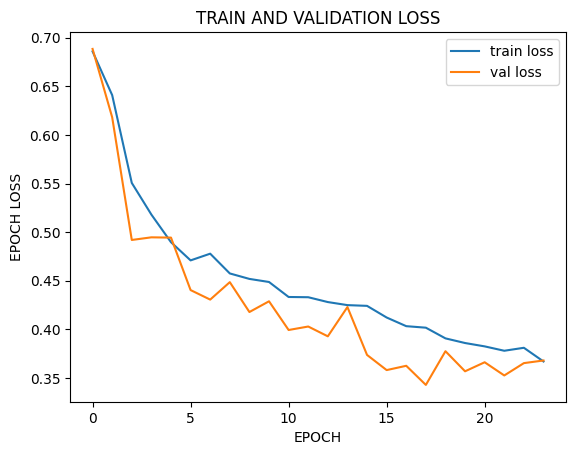

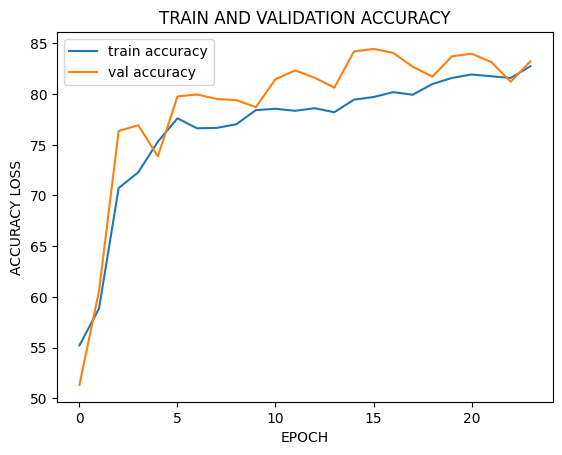

In [204]:
plt.plot(x, label='train loss')
plt.plot(y, label='val loss')
plt.xlabel('EPOCH')
plt.ylabel('EPOCH LOSS')
plt.title('TRAIN AND VALIDATION LOSS')
plt.legend()
plt.show()
plt.plot(m, label='train accuracy')
plt.plot(n, label='val accuracy')
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY LOSS')
plt.title('TRAIN AND VALIDATION ACCURACY')
plt.legend()
plt.show()

In [222]:
test_loss, test_acc = test_step(data_loader=test_dataloader,
                                    model=model,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn,
                                    device=device
                                    )
print(test_loss)
print(test_acc)

   test: 100%|██████████| 16/16 [00:02<00:00,  5.45it/s, train_acc=83.6, train_loss=0.371]

0.3706437647342682
83.59375



Classification Report:
              precision    recall  f1-score   support

      benign       0.95      0.69      0.80       266
   malignant       0.72      0.96      0.82       228

    accuracy                           0.81       494
   macro avg       0.84      0.82      0.81       494
weighted avg       0.84      0.81      0.81       494



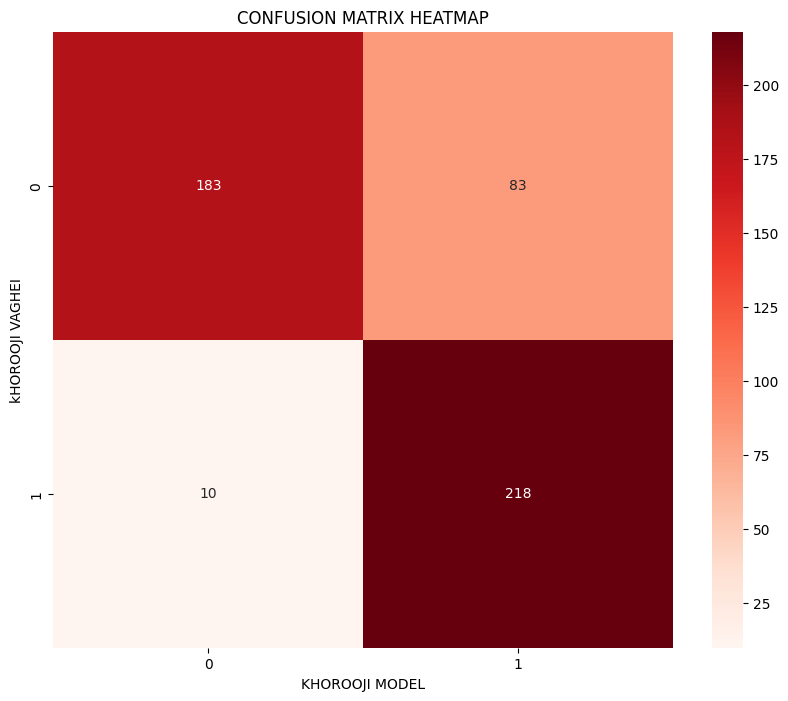

In [223]:
print("\nClassification Report:")
y_true, y_pred = [], []
with torch.no_grad():
    for inputs, labels in val_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

print(classification_report(y_true, y_pred, target_names=train_dataloader.dataset.dataset.classes))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=range(2), yticklabels=range(2))
plt.xlabel('KHOROOJI MODEL')
plt.ylabel('kHOROOJI VAGHEI')
plt.title('CONFUSION MATRIX HEATMAP')
plt.show()


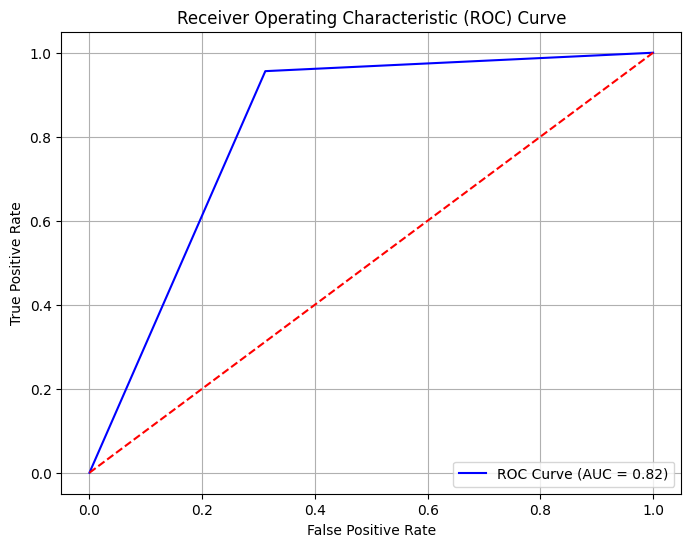

In [224]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

###َMODIFIED CNN Model With Augmentation and Dropout. optimizer : SGD, Cross entropy loss Function

In [177]:
x = '/content/skin/'
total_images = []
classes = os.listdir(x)
classes = classes[:2]
for i in classes:
  total_images += glob.glob(x + i + '/*.jpg')
print(total_images)


['/content/skin/benign/1061.jpg', '/content/skin/benign/0838.jpg', '/content/skin/benign/1105.jpg', '/content/skin/benign/0065.jpg', '/content/skin/benign/0353.jpg', '/content/skin/benign/1172.jpg', '/content/skin/benign/0471.jpg', '/content/skin/benign/0089.jpg', '/content/skin/benign/1184.jpg', '/content/skin/benign/0475.jpg', '/content/skin/benign/1727.jpg', '/content/skin/benign/0120.jpg', '/content/skin/benign/0094.jpg', '/content/skin/benign/1422.jpg', '/content/skin/benign/1680.jpg', '/content/skin/benign/0208.jpg', '/content/skin/benign/0066.jpg', '/content/skin/benign/0948.jpg', '/content/skin/benign/1265.jpg', '/content/skin/benign/0142.jpg', '/content/skin/benign/1364.jpg', '/content/skin/benign/0046.jpg', '/content/skin/benign/0932.jpg', '/content/skin/benign/1439.jpg', '/content/skin/benign/0583.jpg', '/content/skin/benign/1154.jpg', '/content/skin/benign/1741.jpg', '/content/skin/benign/1503.jpg', '/content/skin/benign/1007.jpg', '/content/skin/benign/0138.jpg', '/content

In [178]:
Transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomAffine(degrees=0, scale=(0.8, 1.2)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean = 0.5, std = 0.5)])

In [179]:
total_dataset = datasets.ImageFolder(root=x, transform=Transforms)


train_size = int(0.7 * len(total_dataset))
val_size = int(0.15 * len(total_dataset))
test_size = len(total_dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(total_dataset, [train_size, val_size, test_size])


train_dataloader =DataLoader(dataset = train_dataset, batch_size = 32, shuffle = True)
val_dataloader =DataLoader(dataset = val_dataset, batch_size = 32, shuffle = True)
test_dataloader =DataLoader(dataset = test_dataset, batch_size = 32, shuffle = True)

In [180]:
total_dataset = datasets.ImageFolder(root=x, transform=Transforms)


train_size = int(0.7 * len(total_dataset))
val_size = int(0.15 * len(total_dataset))
test_size = len(total_dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(total_dataset, [train_size, val_size, test_size])


train_dataloader =DataLoader(dataset = train_dataset, batch_size = 32, shuffle = True)
val_dataloader =DataLoader(dataset = val_dataset, batch_size = 32, shuffle = True)
test_dataloader =DataLoader(dataset = test_dataset, batch_size = 32, shuffle = True)

In [181]:
model = CNN_Model(input_shape=3, hidden_units=16, output_shape=2)
model

CNN_Model(
  (CNN_block): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(8, 8))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
    (9): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=512, out_features=64, bias=True)
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): Dropout(p=0.4, inplace=False)
   

In [182]:
def train_step(model,
               data_loader,
               loss_fn,
               optimizer,
               accuracy_fn,
               device):

    # Send model to GPU
    model.to(device)
    train_loss, train_acc, counter = 0, 0, 0
    with tqdm(data_loader, desc ="  train") as train_tqdm:
        for X, y in train_tqdm:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            y_pred = model(X)

            # 2. Calculate loss
            loss = loss_fn(y_pred, y)
            train_loss += loss
            train_acc += accuracy_fn(true=y.cpu(),
                                     pred=y_pred.cpu())
            counter += 1
            train_tqdm.set_postfix(train_acc=train_acc/counter, train_loss=train_loss.item()/counter, refresh=True)

            # 3. Optimizer zero grad
            optimizer.zero_grad()

            # 4. Loss backward
            loss.backward()

            # 5. Optimizer step
            optimizer.step()

        # Calculate loss and accuracy per epoch and print out what's happening
        train_loss /= len(data_loader)
        train_acc /= len(data_loader)

    return train_loss.item(), train_acc


In [183]:
def test_step(model,
              data_loader,
              loss_fn,
              accuracy_fn,
              device):

    # Send model to GPU
    model.to(device)

    # put model in eval mode
    model.eval()
    test_loss, test_acc, counter = 0, 0, 0
    with tqdm(data_loader, desc ="   test") as test_tqdm:
        for X, y in test_tqdm:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(true=y.cpu(),
                                    pred=test_pred.cpu())
            counter += 1
            test_tqdm.set_postfix(train_acc=test_acc/counter, train_loss=test_loss.item()/counter, refresh=True)

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc  /= len(data_loader)

    return test_loss.item(), test_acc

In [184]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0001, momentum = 0.9)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
def accuracy_fn(true, pred):
    pred = F.softmax(pred, dim = 1)
    true = torch.zeros(pred.shape[0], pred.shape[1]).scatter_(1, true.unsqueeze(1), 1.)
    acc = (true.argmax(-1) == pred.argmax(-1)).float().detach().numpy()
    acc = float((100 * acc.sum()) / len(acc))
    return round(acc, 4)

In [185]:
from timeit import default_timer as timer

train_epoch_loss = []
train_epoch_accuracy = []
val_epoch_loss = []
val_epoch_accuracy = []
test_epoch_loss = []
test_epoch_accuracy = []
train_time_start = timer()
early_stop = 0
epochs = 20
for epoch in range(epochs):
  print("EPOCH {}/{} :".format(epoch +1, epochs))
  train_loss, train_acc = train_step(data_loader=train_dataloader,
                                              model=model,
                                              loss_fn=loss_fn,
                                              optimizer=optimizer,
                                              accuracy_fn=accuracy_fn,
                                              device=device
                                              )
  test_loss, test_acc = test_step(data_loader=val_dataloader,
                                    model=model,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn,
                                    device=device
                                    )

  train_epoch_loss.append(train_loss)
  train_epoch_accuracy.append(train_acc)
  val_epoch_loss.append(test_loss)
  val_epoch_accuracy.append(test_acc)
  if test_loss <= min(val_epoch_loss):
    early_stop = 0
  else:
    early_stop +=1
    if early_stop == 6:
      break
train_time_end = timer()
total_time = train_time_end - train_time_start
print(f"\n\nTrain time: {total_time:.3f} seconds")

EPOCH 1/20 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.57it/s, train_acc=45, train_loss=0.698]


EPOCH 2/20 :


   test: 100%|██████████| 16/16 [00:03<00:00,  5.27it/s, train_acc=45.3, train_loss=0.697]


EPOCH 3/20 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.60it/s, train_acc=45.3, train_loss=0.696]


EPOCH 4/20 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.45it/s, train_acc=45, train_loss=0.695]


EPOCH 5/20 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.35it/s, train_acc=45.5, train_loss=0.694]


EPOCH 6/20 :


   test: 100%|██████████| 16/16 [00:04<00:00,  3.95it/s, train_acc=46, train_loss=0.693]


EPOCH 7/20 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.49it/s, train_acc=54.5, train_loss=0.693]


EPOCH 8/20 :


   test: 100%|██████████| 16/16 [00:04<00:00,  3.47it/s, train_acc=55.2, train_loss=0.692]


EPOCH 9/20 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.38it/s, train_acc=54.2, train_loss=0.692]


EPOCH 10/20 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.15it/s, train_acc=54.5, train_loss=0.691]


EPOCH 11/20 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.72it/s, train_acc=54.5, train_loss=0.691]


EPOCH 12/20 :


   test: 100%|██████████| 16/16 [00:05<00:00,  2.79it/s, train_acc=54.5, train_loss=0.691]


EPOCH 13/20 :


   test: 100%|██████████| 16/16 [00:03<00:00,  5.29it/s, train_acc=53.7, train_loss=0.691]


EPOCH 14/20 :


   test: 100%|██████████| 16/16 [00:03<00:00,  5.20it/s, train_acc=54.5, train_loss=0.69]


EPOCH 15/20 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.45it/s, train_acc=55.2, train_loss=0.69]


EPOCH 16/20 :


   test: 100%|██████████| 16/16 [00:04<00:00,  3.85it/s, train_acc=55, train_loss=0.69]


EPOCH 17/20 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.40it/s, train_acc=54.5, train_loss=0.69]


EPOCH 18/20 :


   test: 100%|██████████| 16/16 [00:03<00:00,  5.21it/s, train_acc=55.2, train_loss=0.689]


EPOCH 19/20 :


   test: 100%|██████████| 16/16 [00:03<00:00,  5.32it/s, train_acc=54.2, train_loss=0.69]


EPOCH 20/20 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.36it/s, train_acc=54.7, train_loss=0.689]



Train time: 399.430 seconds


In [186]:
torch.save(model.state_dict(), 'saved_model')

In [187]:
x = train_epoch_loss
y = val_epoch_loss

In [188]:
m = train_epoch_accuracy
n = val_epoch_accuracy

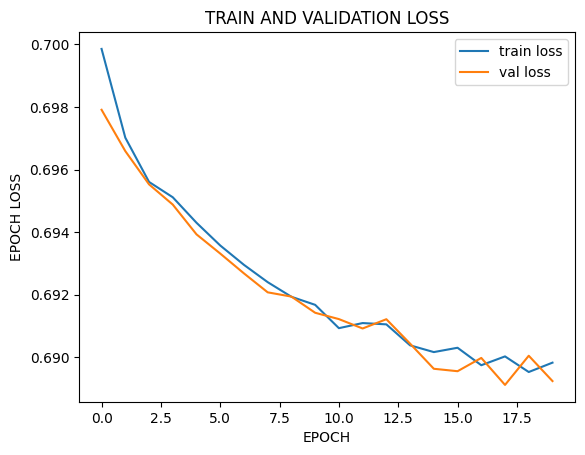

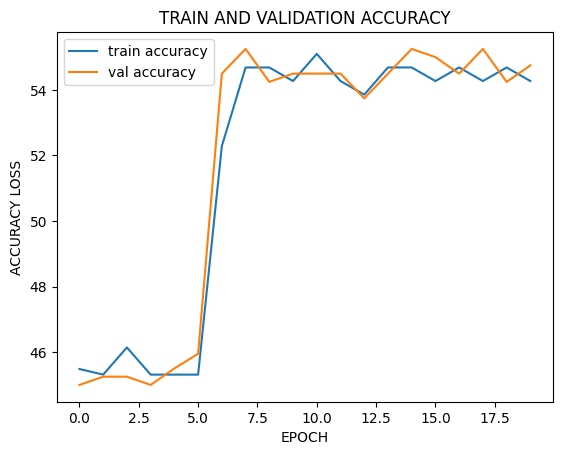

In [189]:
plt.plot(x, label='train loss')
plt.plot(y, label='val loss')
plt.xlabel('EPOCH')
plt.ylabel('EPOCH LOSS')
plt.title('TRAIN AND VALIDATION LOSS')
plt.legend()
plt.show()
plt.plot(m, label='train accuracy')
plt.plot(n, label='val accuracy')
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY LOSS')
plt.title('TRAIN AND VALIDATION ACCURACY')
plt.legend()
plt.show()

In [190]:
test_loss, test_acc = test_step(data_loader=test_dataloader,
                                    model=model,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn,
                                    device=device
                                    )
print(test_loss)
print(test_acc)

   test: 100%|██████████| 16/16 [00:04<00:00,  3.91it/s, train_acc=55.1, train_loss=0.689]

0.6888171434402466
55.078125


###َMODIFIED CNN Model With Augmentation and Dropout. optimizer : AdamW, Cross entropy loss Function

In [205]:
x = '/content/skin/'
total_images = []
classes = os.listdir(x)
classes = classes[:2]
for i in classes:
  total_images += glob.glob(x + i + '/*.jpg')
print(total_images)


['/content/skin/benign/1061.jpg', '/content/skin/benign/0838.jpg', '/content/skin/benign/1105.jpg', '/content/skin/benign/0065.jpg', '/content/skin/benign/0353.jpg', '/content/skin/benign/1172.jpg', '/content/skin/benign/0471.jpg', '/content/skin/benign/0089.jpg', '/content/skin/benign/1184.jpg', '/content/skin/benign/0475.jpg', '/content/skin/benign/1727.jpg', '/content/skin/benign/0120.jpg', '/content/skin/benign/0094.jpg', '/content/skin/benign/1422.jpg', '/content/skin/benign/1680.jpg', '/content/skin/benign/0208.jpg', '/content/skin/benign/0066.jpg', '/content/skin/benign/0948.jpg', '/content/skin/benign/1265.jpg', '/content/skin/benign/0142.jpg', '/content/skin/benign/1364.jpg', '/content/skin/benign/0046.jpg', '/content/skin/benign/0932.jpg', '/content/skin/benign/1439.jpg', '/content/skin/benign/0583.jpg', '/content/skin/benign/1154.jpg', '/content/skin/benign/1741.jpg', '/content/skin/benign/1503.jpg', '/content/skin/benign/1007.jpg', '/content/skin/benign/0138.jpg', '/content

In [206]:
Transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomAffine(degrees=0, scale=(0.8, 1.2)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean = 0.5, std = 0.5)])

In [207]:
total_dataset = datasets.ImageFolder(root=x, transform=Transforms)


train_size = int(0.7 * len(total_dataset))
val_size = int(0.15 * len(total_dataset))
test_size = len(total_dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(total_dataset, [train_size, val_size, test_size])


train_dataloader =DataLoader(dataset = train_dataset, batch_size = 32, shuffle = True)
val_dataloader =DataLoader(dataset = val_dataset, batch_size = 32, shuffle = True)
test_dataloader =DataLoader(dataset = test_dataset, batch_size = 32, shuffle = True)

In [208]:
class CNN_Model(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()

        self.CNN_block = nn.Sequential(
            nn.Conv2d(3, 16, 3, 8, 0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
            nn.Conv2d(16, 32, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
            nn.Conv2d(32, 64, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=1),
            nn.Conv2d(64, 128, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512, 64),
            nn.Dropout(0.4),
            nn.Linear(64, 32),
            nn.Dropout(0.4),
            nn.Linear(32, 2))

    def forward(self, x: torch.Tensor):
        x = self.CNN_block(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x


In [209]:
model = CNN_Model(input_shape=3, hidden_units=16, output_shape=2)
model

CNN_Model(
  (CNN_block): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(8, 8))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
    (9): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=512, out_features=64, bias=True)
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): Dropout(p=0.4, inplace=False)
   

In [210]:
def train_step(model,
               data_loader,
               loss_fn,
               optimizer,
               accuracy_fn,
               device):

    # Send model to GPU
    model.to(device)
    train_loss, train_acc, counter = 0, 0, 0
    with tqdm(data_loader, desc ="  train") as train_tqdm:
        for X, y in train_tqdm:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            y_pred = model(X)

            # 2. Calculate loss
            loss = loss_fn(y_pred, y)
            train_loss += loss
            train_acc += accuracy_fn(true=y.cpu(),
                                     pred=y_pred.cpu())
            counter += 1
            train_tqdm.set_postfix(train_acc=train_acc/counter, train_loss=train_loss.item()/counter, refresh=True)

            # 3. Optimizer zero grad
            optimizer.zero_grad()

            # 4. Loss backward
            loss.backward()

            # 5. Optimizer step
            optimizer.step()

        # Calculate loss and accuracy per epoch and print out what's happening
        train_loss /= len(data_loader)
        train_acc /= len(data_loader)

    return train_loss.item(), train_acc


In [211]:
def test_step(model,
              data_loader,
              loss_fn,
              accuracy_fn,
              device):

    # Send model to GPU
    model.to(device)

    # put model in eval mode
    model.eval()
    test_loss, test_acc, counter = 0, 0, 0
    with tqdm(data_loader, desc ="   test") as test_tqdm:
        for X, y in test_tqdm:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(true=y.cpu(),
                                    pred=test_pred.cpu())
            counter += 1
            test_tqdm.set_postfix(train_acc=test_acc/counter, train_loss=test_loss.item()/counter, refresh=True)

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc  /= len(data_loader)

    return test_loss.item(), test_acc

In [212]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr = 0.0001)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
def accuracy_fn(true, pred):
    pred = F.softmax(pred, dim = 1)
    true = torch.zeros(pred.shape[0], pred.shape[1]).scatter_(1, true.unsqueeze(1), 1.)
    acc = (true.argmax(-1) == pred.argmax(-1)).float().detach().numpy()
    acc = float((100 * acc.sum()) / len(acc))
    return round(acc, 4)

In [213]:
from timeit import default_timer as timer

train_epoch_loss = []
train_epoch_accuracy = []
val_epoch_loss = []
val_epoch_accuracy = []
test_epoch_loss = []
test_epoch_accuracy = []
train_time_start = timer()
early_stop = 0
epochs = 100
for epoch in range(epochs):
  print("EPOCH {}/{} :".format(epoch +1, epochs))
  train_loss, train_acc = train_step(data_loader=train_dataloader,
                                              model=model,
                                              loss_fn=loss_fn,
                                              optimizer=optimizer,
                                              accuracy_fn=accuracy_fn,
                                              device=device
                                              )
  test_loss, test_acc = test_step(data_loader=val_dataloader,
                                    model=model,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn,
                                    device=device
                                    )

  train_epoch_loss.append(train_loss)
  train_epoch_accuracy.append(train_acc)
  val_epoch_loss.append(test_loss)
  val_epoch_accuracy.append(test_acc)
  if test_loss <= min(val_epoch_loss):
    early_stop = 0
  else:
    early_stop +=1
    if early_stop == 6:
      break
train_time_end = timer()
total_time = train_time_end - train_time_start
print(f"\n\nTrain time: {total_time:.3f} seconds")

EPOCH 1/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.12it/s, train_acc=54.4, train_loss=0.677]


EPOCH 2/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.39it/s, train_acc=72.4, train_loss=0.538]


EPOCH 3/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.48it/s, train_acc=76.1, train_loss=0.517]


EPOCH 4/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.48it/s, train_acc=76.6, train_loss=0.487]


EPOCH 5/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.40it/s, train_acc=76.3, train_loss=0.476]


EPOCH 6/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s, train_acc=76.8, train_loss=0.463]


EPOCH 7/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.48it/s, train_acc=76.4, train_loss=0.467]


EPOCH 8/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.70it/s, train_acc=81.4, train_loss=0.427]


EPOCH 9/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  5.28it/s, train_acc=81, train_loss=0.412]


EPOCH 10/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.43it/s, train_acc=78.3, train_loss=0.441]


EPOCH 11/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.22it/s, train_acc=81.1, train_loss=0.408]


EPOCH 12/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.51it/s, train_acc=80.6, train_loss=0.403]


EPOCH 13/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  5.04it/s, train_acc=81.1, train_loss=0.386]


EPOCH 14/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.47it/s, train_acc=81.8, train_loss=0.388]


EPOCH 15/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.44it/s, train_acc=79.7, train_loss=0.406]


EPOCH 16/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.21it/s, train_acc=82.3, train_loss=0.383]


EPOCH 17/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.58it/s, train_acc=82.1, train_loss=0.387]


EPOCH 18/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.92it/s, train_acc=81.8, train_loss=0.39]


EPOCH 19/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.36it/s, train_acc=82.3, train_loss=0.38]


EPOCH 20/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.45it/s, train_acc=83.5, train_loss=0.359]


EPOCH 21/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.93it/s, train_acc=82.7, train_loss=0.384]


EPOCH 22/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  5.20it/s, train_acc=85.2, train_loss=0.361]


EPOCH 23/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.12it/s, train_acc=83.8, train_loss=0.352]


EPOCH 24/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.55it/s, train_acc=83.1, train_loss=0.365]


EPOCH 25/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.59it/s, train_acc=84.2, train_loss=0.365]


EPOCH 26/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.40it/s, train_acc=82.6, train_loss=0.37]


EPOCH 27/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.47it/s, train_acc=81.5, train_loss=0.383]


EPOCH 28/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  5.19it/s, train_acc=80.6, train_loss=0.391]


EPOCH 29/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  5.31it/s, train_acc=82.4, train_loss=0.378]



Train time: 555.987 seconds


In [215]:
torch.save(model.state_dict(), 'saved_model')

In [216]:
x = train_epoch_loss
y = val_epoch_loss

In [217]:
m = train_epoch_accuracy
n = val_epoch_accuracy


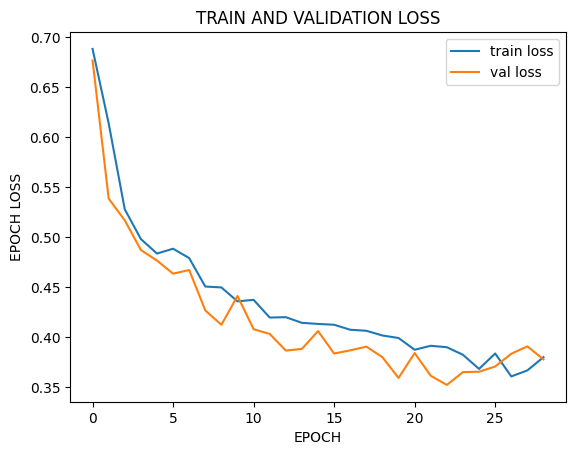

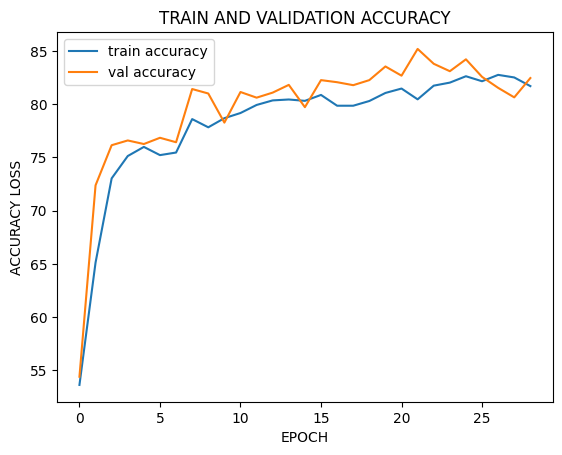

In [218]:
plt.plot(x, label='train loss')
plt.plot(y, label='val loss')
plt.xlabel('EPOCH')
plt.ylabel('EPOCH LOSS')
plt.title('TRAIN AND VALIDATION LOSS')
plt.legend()
plt.show()
plt.plot(m, label='train accuracy')
plt.plot(n, label='val accuracy')
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY LOSS')
plt.title('TRAIN AND VALIDATION ACCURACY')
plt.legend()
plt.show()

In [219]:
test_loss, test_acc = test_step(data_loader=test_dataloader,
                                    model=model,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn,
                                    device=device
                                    )
print(test_loss)
print(test_acc)

   test: 100%|██████████| 16/16 [00:02<00:00,  5.43it/s, train_acc=84.4, train_loss=0.364]

0.3637116253376007
84.375



Classification Report:
              precision    recall  f1-score   support

      benign       0.95      0.71      0.81       266
   malignant       0.74      0.96      0.83       228

    accuracy                           0.82       494
   macro avg       0.84      0.83      0.82       494
weighted avg       0.85      0.82      0.82       494



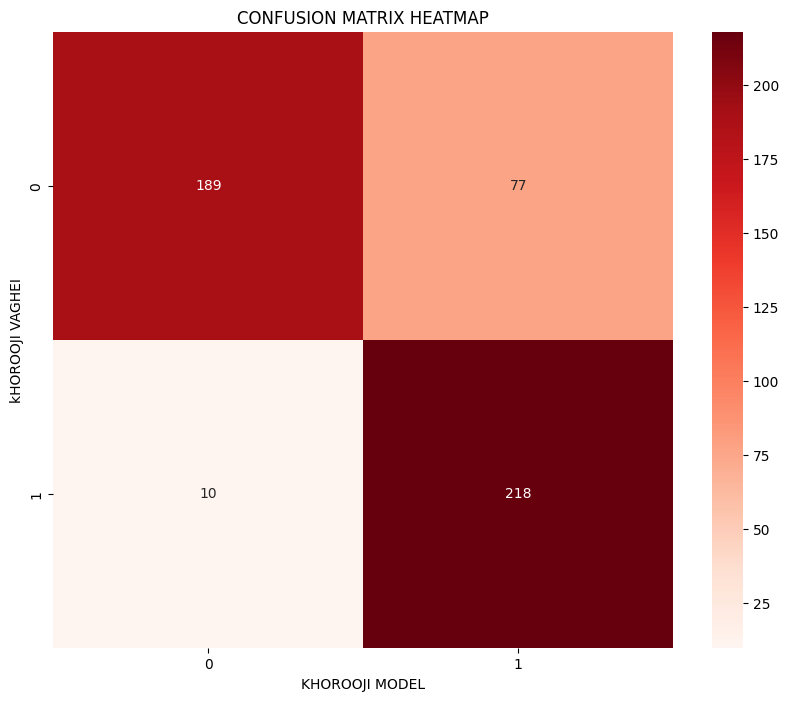

In [220]:
print("\nClassification Report:")
y_true, y_pred = [], []
with torch.no_grad():
    for inputs, labels in val_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

print(classification_report(y_true, y_pred, target_names=train_dataloader.dataset.dataset.classes))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=range(2), yticklabels=range(2))
plt.xlabel('KHOROOJI MODEL')
plt.ylabel('kHOROOJI VAGHEI')
plt.title('CONFUSION MATRIX HEATMAP')
plt.show()


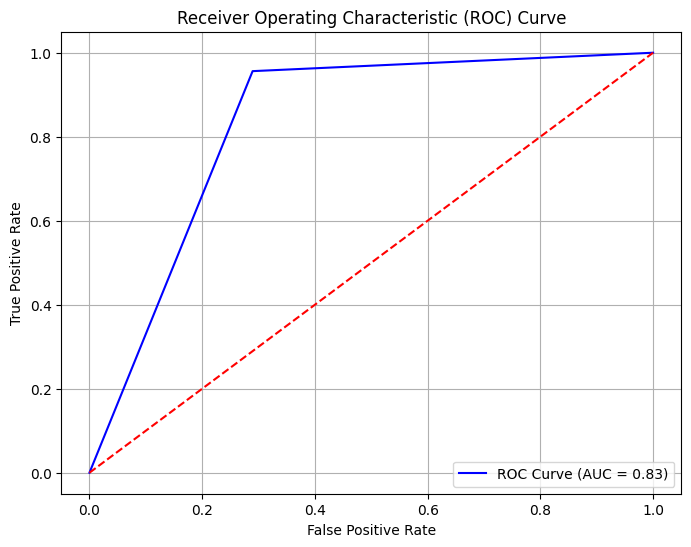

In [221]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

###َMODIFIED CNN Model With Augmentation and Dropout. optimizer : RMSprop, Cross entropy loss Function

In [225]:
x = '/content/skin/'
total_images = []
classes = os.listdir(x)
classes = classes[:2]
for i in classes:
  total_images += glob.glob(x + i + '/*.jpg')
print(total_images)

['/content/skin/benign/1061.jpg', '/content/skin/benign/0838.jpg', '/content/skin/benign/1105.jpg', '/content/skin/benign/0065.jpg', '/content/skin/benign/0353.jpg', '/content/skin/benign/1172.jpg', '/content/skin/benign/0471.jpg', '/content/skin/benign/0089.jpg', '/content/skin/benign/1184.jpg', '/content/skin/benign/0475.jpg', '/content/skin/benign/1727.jpg', '/content/skin/benign/0120.jpg', '/content/skin/benign/0094.jpg', '/content/skin/benign/1422.jpg', '/content/skin/benign/1680.jpg', '/content/skin/benign/0208.jpg', '/content/skin/benign/0066.jpg', '/content/skin/benign/0948.jpg', '/content/skin/benign/1265.jpg', '/content/skin/benign/0142.jpg', '/content/skin/benign/1364.jpg', '/content/skin/benign/0046.jpg', '/content/skin/benign/0932.jpg', '/content/skin/benign/1439.jpg', '/content/skin/benign/0583.jpg', '/content/skin/benign/1154.jpg', '/content/skin/benign/1741.jpg', '/content/skin/benign/1503.jpg', '/content/skin/benign/1007.jpg', '/content/skin/benign/0138.jpg', '/content

In [226]:
Transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomAffine(degrees=0, scale=(0.8, 1.2)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean = 0.5, std = 0.5)])

In [227]:
total_dataset = datasets.ImageFolder(root=x, transform=Transforms)


train_size = int(0.7 * len(total_dataset))
val_size = int(0.15 * len(total_dataset))
test_size = len(total_dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(total_dataset, [train_size, val_size, test_size])


train_dataloader =DataLoader(dataset = train_dataset, batch_size = 32, shuffle = True)
val_dataloader =DataLoader(dataset = val_dataset, batch_size = 32, shuffle = True)
test_dataloader =DataLoader(dataset = test_dataset, batch_size = 32, shuffle = True)

In [228]:
class CNN_Model(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()

        self.CNN_block = nn.Sequential(
            nn.Conv2d(3, 16, 3, 8, 0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
            nn.Conv2d(16, 32, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
            nn.Conv2d(32, 64, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=1),
            nn.Conv2d(64, 128, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512, 64),
            nn.Dropout(0.4),
            nn.Linear(64, 32),
            nn.Dropout(0.4),
            nn.Linear(32, 2))

    def forward(self, x: torch.Tensor):
        x = self.CNN_block(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x


In [229]:
model = CNN_Model(input_shape=3, hidden_units=16, output_shape=2)
model

CNN_Model(
  (CNN_block): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(8, 8))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
    (9): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=512, out_features=64, bias=True)
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): Dropout(p=0.4, inplace=False)
   

In [230]:
def train_step(model,
               data_loader,
               loss_fn,
               optimizer,
               accuracy_fn,
               device):

    # Send model to GPU
    model.to(device)
    train_loss, train_acc, counter = 0, 0, 0
    with tqdm(data_loader, desc ="  train") as train_tqdm:
        for X, y in train_tqdm:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            y_pred = model(X)

            # 2. Calculate loss
            loss = loss_fn(y_pred, y)
            train_loss += loss
            train_acc += accuracy_fn(true=y.cpu(),
                                     pred=y_pred.cpu())
            counter += 1
            train_tqdm.set_postfix(train_acc=train_acc/counter, train_loss=train_loss.item()/counter, refresh=True)

            # 3. Optimizer zero grad
            optimizer.zero_grad()

            # 4. Loss backward
            loss.backward()

            # 5. Optimizer step
            optimizer.step()

        # Calculate loss and accuracy per epoch and print out what's happening
        train_loss /= len(data_loader)
        train_acc /= len(data_loader)

    return train_loss.item(), train_acc


In [231]:
def test_step(model,
              data_loader,
              loss_fn,
              accuracy_fn,
              device):

    # Send model to GPU
    model.to(device)

    # put model in eval mode
    model.eval()
    test_loss, test_acc, counter = 0, 0, 0
    with tqdm(data_loader, desc ="   test") as test_tqdm:
        for X, y in test_tqdm:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(true=y.cpu(),
                                    pred=test_pred.cpu())
            counter += 1
            test_tqdm.set_postfix(train_acc=test_acc/counter, train_loss=test_loss.item()/counter, refresh=True)

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc  /= len(data_loader)

    return test_loss.item(), test_acc

In [232]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.0001)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
def accuracy_fn(true, pred):
    pred = F.softmax(pred, dim = 1)
    true = torch.zeros(pred.shape[0], pred.shape[1]).scatter_(1, true.unsqueeze(1), 1.)
    acc = (true.argmax(-1) == pred.argmax(-1)).float().detach().numpy()
    acc = float((100 * acc.sum()) / len(acc))
    return round(acc, 4)

In [233]:
from timeit import default_timer as timer

train_epoch_loss = []
train_epoch_accuracy = []
val_epoch_loss = []
val_epoch_accuracy = []
test_epoch_loss = []
test_epoch_accuracy = []
train_time_start = timer()
early_stop = 0
epochs = 100
for epoch in range(epochs):
  print("EPOCH {}/{} :".format(epoch +1, epochs))
  train_loss, train_acc = train_step(data_loader=train_dataloader,
                                              model=model,
                                              loss_fn=loss_fn,
                                              optimizer=optimizer,
                                              accuracy_fn=accuracy_fn,
                                              device=device
                                              )
  test_loss, test_acc = test_step(data_loader=val_dataloader,
                                    model=model,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn,
                                    device=device
                                    )

  train_epoch_loss.append(train_loss)
  train_epoch_accuracy.append(train_acc)
  val_epoch_loss.append(test_loss)
  val_epoch_accuracy.append(test_acc)
  if test_loss <= min(val_epoch_loss):
    early_stop = 0
  else:
    early_stop +=1
    if early_stop == 6:
      break
train_time_end = timer()
total_time = train_time_end - train_time_start
print(f"\n\nTrain time: {total_time:.3f} seconds")

EPOCH 1/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.50it/s, train_acc=56.6, train_loss=0.725]


EPOCH 2/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.68it/s, train_acc=76.3, train_loss=0.495]


EPOCH 3/100 :


   test: 100%|██████████| 16/16 [00:06<00:00,  2.50it/s, train_acc=78.9, train_loss=0.464]


EPOCH 4/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  5.10it/s, train_acc=77.2, train_loss=0.468]


EPOCH 5/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.18it/s, train_acc=75.4, train_loss=0.506]


EPOCH 6/100 :


   test: 100%|██████████| 16/16 [00:04<00:00,  3.36it/s, train_acc=70, train_loss=0.648]


EPOCH 7/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  5.27it/s, train_acc=75.6, train_loss=0.493]


EPOCH 8/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.99it/s, train_acc=80, train_loss=0.448]


EPOCH 9/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.45it/s, train_acc=79.9, train_loss=0.433]


EPOCH 10/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s, train_acc=68.8, train_loss=0.588]


EPOCH 11/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.52it/s, train_acc=81, train_loss=0.425]


EPOCH 12/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.52it/s, train_acc=80.7, train_loss=0.409]


EPOCH 13/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.48it/s, train_acc=80.6, train_loss=0.424]


EPOCH 14/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.72it/s, train_acc=68.4, train_loss=0.6]


EPOCH 15/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.58it/s, train_acc=73.4, train_loss=0.535]


EPOCH 16/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.33it/s, train_acc=80.3, train_loss=0.411]


EPOCH 17/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.75it/s, train_acc=79.5, train_loss=0.417]


EPOCH 18/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.99it/s, train_acc=62, train_loss=0.854]



Train time: 375.084 seconds


In [234]:
torch.save(model.state_dict(), 'saved_model')

In [235]:
x = train_epoch_loss
y = val_epoch_loss

In [236]:
m = train_epoch_accuracy
n = val_epoch_accuracy

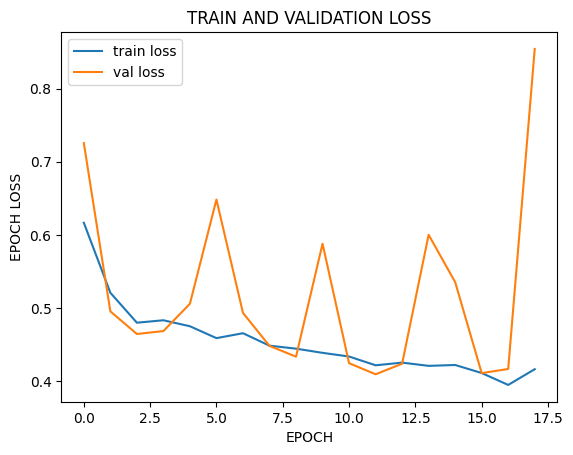

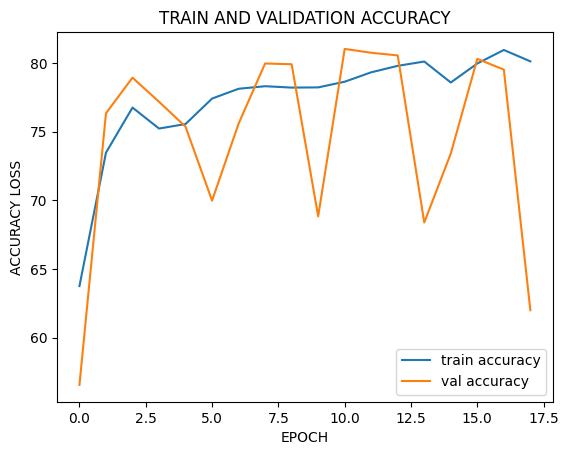

In [237]:
plt.plot(x, label='train loss')
plt.plot(y, label='val loss')
plt.xlabel('EPOCH')
plt.ylabel('EPOCH LOSS')
plt.title('TRAIN AND VALIDATION LOSS')
plt.legend()
plt.show()
plt.plot(m, label='train accuracy')
plt.plot(n, label='val accuracy')
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY LOSS')
plt.title('TRAIN AND VALIDATION ACCURACY')
plt.legend()
plt.show()

In [238]:
test_loss, test_acc = test_step(data_loader=test_dataloader,
                                    model=model,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn,
                                    device=device
                                    )
print(test_loss)
print(test_acc)

   test: 100%|██████████| 16/16 [00:02<00:00,  5.59it/s, train_acc=58.4, train_loss=0.936]

0.9363384246826172
58.3984375



Classification Report:
              precision    recall  f1-score   support

      benign       0.60      0.99      0.75       269
   malignant       0.92      0.21      0.35       225

    accuracy                           0.63       494
   macro avg       0.76      0.60      0.55       494
weighted avg       0.75      0.63      0.56       494



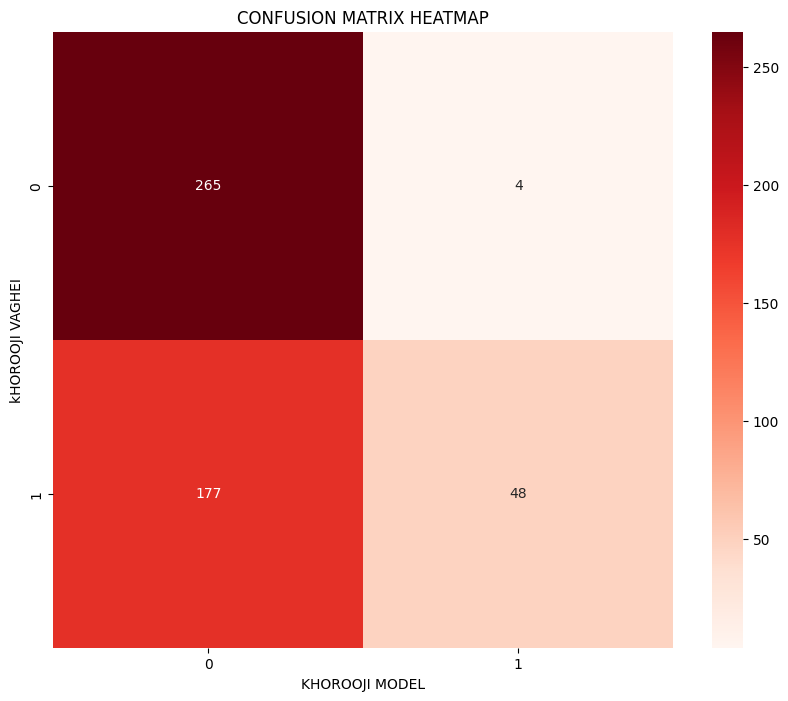

In [239]:
print("\nClassification Report:")
y_true, y_pred = [], []
with torch.no_grad():
    for inputs, labels in val_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

print(classification_report(y_true, y_pred, target_names=train_dataloader.dataset.dataset.classes))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=range(2), yticklabels=range(2))
plt.xlabel('KHOROOJI MODEL')
plt.ylabel('kHOROOJI VAGHEI')
plt.title('CONFUSION MATRIX HEATMAP')
plt.show()


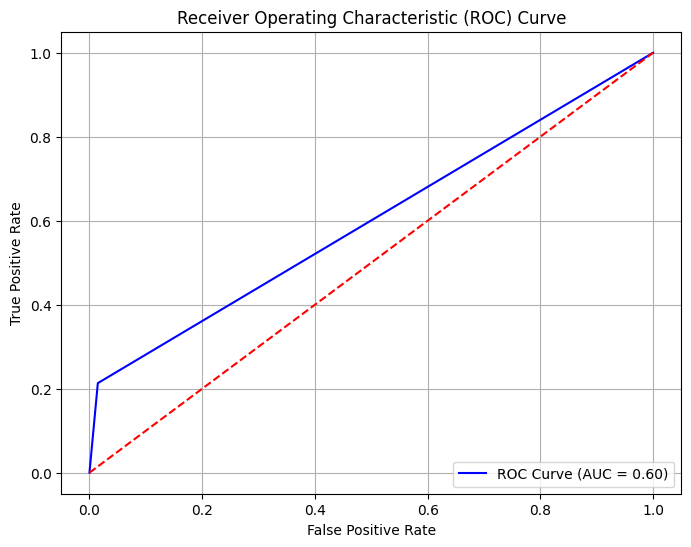

In [240]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

###َDeeper CNN model

In [262]:
x = '/content/skin/'
total_images = []
classes = os.listdir(x)
classes = classes[:2]
for i in classes:
  total_images += glob.glob(x + i + '/*.jpg')
print(total_images)


['/content/skin/benign/1061.jpg', '/content/skin/benign/0838.jpg', '/content/skin/benign/1105.jpg', '/content/skin/benign/0065.jpg', '/content/skin/benign/0353.jpg', '/content/skin/benign/1172.jpg', '/content/skin/benign/0471.jpg', '/content/skin/benign/0089.jpg', '/content/skin/benign/1184.jpg', '/content/skin/benign/0475.jpg', '/content/skin/benign/1727.jpg', '/content/skin/benign/0120.jpg', '/content/skin/benign/0094.jpg', '/content/skin/benign/1422.jpg', '/content/skin/benign/1680.jpg', '/content/skin/benign/0208.jpg', '/content/skin/benign/0066.jpg', '/content/skin/benign/0948.jpg', '/content/skin/benign/1265.jpg', '/content/skin/benign/0142.jpg', '/content/skin/benign/1364.jpg', '/content/skin/benign/0046.jpg', '/content/skin/benign/0932.jpg', '/content/skin/benign/1439.jpg', '/content/skin/benign/0583.jpg', '/content/skin/benign/1154.jpg', '/content/skin/benign/1741.jpg', '/content/skin/benign/1503.jpg', '/content/skin/benign/1007.jpg', '/content/skin/benign/0138.jpg', '/content

In [259]:
Transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomAffine(degrees=0, scale=(0.8, 1.2)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean = 0.5, std = 0.5)])

In [263]:
total_dataset = datasets.ImageFolder(root=x, transform=Transforms)


train_size = int(0.7 * len(total_dataset))
val_size = int(0.15 * len(total_dataset))
test_size = len(total_dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(total_dataset, [train_size, val_size, test_size])


train_dataloader =DataLoader(dataset = train_dataset, batch_size = 32, shuffle = True)
val_dataloader =DataLoader(dataset = val_dataset, batch_size = 32, shuffle = True)
test_dataloader =DataLoader(dataset = test_dataset, batch_size = 32, shuffle = True)

In [264]:
class CNN_Model(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()

        self.CNN_block = nn.Sequential(
            nn.Conv2d(3, 16, 3, 8, 0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
            nn.Conv2d(16, 32, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
            nn.Conv2d(32, 64, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=1),
            nn.Conv2d(64, 128, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512, 256),
            nn.Dropout(0.4),
            nn.Linear(256, 128),
            nn.Dropout(0.4),
            nn.Linear(128, 64),
            nn.Dropout(0.4),
            nn.Linear(64, 32),
            nn.Dropout(0.4),
            nn.Linear(32, 16),
            nn.Dropout(0.4),
            nn.Linear(16, 4),
            nn.Linear(4, 2),
            nn.Dropout(0.4))

    def forward(self, x: torch.Tensor):
        x = self.CNN_block(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x


In [265]:
model = CNN_Model(input_shape=3, hidden_units=16, output_shape=2)
model

CNN_Model(
  (CNN_block): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(8, 8))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
    (9): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): Dropout(p=0.4, inplace=False)


In [266]:
def train_step(model,
               data_loader,
               loss_fn,
               optimizer,
               accuracy_fn,
               device):

    # Send model to GPU
    model.to(device)
    train_loss, train_acc, counter = 0, 0, 0
    with tqdm(data_loader, desc ="  train") as train_tqdm:
        for X, y in train_tqdm:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            y_pred = model(X)

            # 2. Calculate loss
            loss = loss_fn(y_pred, y)
            train_loss += loss
            train_acc += accuracy_fn(true=y.cpu(),
                                     pred=y_pred.cpu())
            counter += 1
            train_tqdm.set_postfix(train_acc=train_acc/counter, train_loss=train_loss.item()/counter, refresh=True)

            # 3. Optimizer zero grad
            optimizer.zero_grad()

            # 4. Loss backward
            loss.backward()

            # 5. Optimizer step
            optimizer.step()

        # Calculate loss and accuracy per epoch and print out what's happening
        train_loss /= len(data_loader)
        train_acc /= len(data_loader)

    return train_loss.item(), train_acc


In [267]:
def test_step(model,
              data_loader,
              loss_fn,
              accuracy_fn,
              device):

    # Send model to GPU
    model.to(device)

    # put model in eval mode
    model.eval()
    test_loss, test_acc, counter = 0, 0, 0
    with tqdm(data_loader, desc ="   test") as test_tqdm:
        for X, y in test_tqdm:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(true=y.cpu(),
                                    pred=test_pred.cpu())
            counter += 1
            test_tqdm.set_postfix(train_acc=test_acc/counter, train_loss=test_loss.item()/counter, refresh=True)

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc  /= len(data_loader)

    return test_loss.item(), test_acc

In [269]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
def accuracy_fn(true, pred):
    pred = F.softmax(pred, dim = 1)
    true = torch.zeros(pred.shape[0], pred.shape[1]).scatter_(1, true.unsqueeze(1), 1.)
    acc = (true.argmax(-1) == pred.argmax(-1)).float().detach().numpy()
    acc = float((100 * acc.sum()) / len(acc))
    return round(acc, 4)

In [270]:
from timeit import default_timer as timer

train_epoch_loss = []
train_epoch_accuracy = []
val_epoch_loss = []
val_epoch_accuracy = []
test_epoch_loss = []
test_epoch_accuracy = []
train_time_start = timer()
early_stop = 0
epochs = 100
for epoch in range(epochs):
  print("EPOCH {}/{} :".format(epoch +1, epochs))
  train_loss, train_acc = train_step(data_loader=train_dataloader,
                                              model=model,
                                              loss_fn=loss_fn,
                                              optimizer=optimizer,
                                              accuracy_fn=accuracy_fn,
                                              device=device
                                              )
  test_loss, test_acc = test_step(data_loader=val_dataloader,
                                    model=model,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn,
                                    device=device
                                    )

  train_epoch_loss.append(train_loss)
  train_epoch_accuracy.append(train_acc)
  val_epoch_loss.append(test_loss)
  val_epoch_accuracy.append(test_acc)
  if test_loss <= min(val_epoch_loss):
    early_stop = 0
  else:
    early_stop +=1
    if early_stop == 6:
      break
train_time_end = timer()
total_time = train_time_end - train_time_start
print(f"\n\nTrain time: {total_time:.3f} seconds")

EPOCH 1/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.61it/s, train_acc=51.8, train_loss=0.691]


EPOCH 2/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.02it/s, train_acc=57.8, train_loss=0.678]


EPOCH 3/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.74it/s, train_acc=68.8, train_loss=0.622]


EPOCH 4/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.44it/s, train_acc=67.5, train_loss=0.562]


EPOCH 5/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.46it/s, train_acc=67.9, train_loss=0.56]


EPOCH 6/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.74it/s, train_acc=73.3, train_loss=0.511]


EPOCH 7/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.53it/s, train_acc=78.7, train_loss=0.459]


EPOCH 8/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.66it/s, train_acc=77, train_loss=0.456]


EPOCH 9/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.17it/s, train_acc=78.8, train_loss=0.484]


EPOCH 10/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  5.23it/s, train_acc=80.2, train_loss=0.43]


EPOCH 11/100 :


   test: 100%|██████████| 16/16 [00:04<00:00,  3.92it/s, train_acc=76.8, train_loss=0.495]


EPOCH 12/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.52it/s, train_acc=80.8, train_loss=0.446]


EPOCH 13/100 :


   test: 100%|██████████| 16/16 [00:04<00:00,  3.75it/s, train_acc=78, train_loss=0.431]


EPOCH 14/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  5.00it/s, train_acc=79.7, train_loss=0.425]


EPOCH 15/100 :


   test: 100%|██████████| 16/16 [00:04<00:00,  3.91it/s, train_acc=77.9, train_loss=0.447]


EPOCH 16/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  5.16it/s, train_acc=79.2, train_loss=0.421]


EPOCH 17/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.27it/s, train_acc=80.1, train_loss=0.419]


EPOCH 18/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.52it/s, train_acc=80.7, train_loss=0.404]


EPOCH 19/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.47it/s, train_acc=79, train_loss=0.404]


EPOCH 20/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.48it/s, train_acc=80, train_loss=0.42]


EPOCH 21/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  5.29it/s, train_acc=80, train_loss=0.428]


EPOCH 22/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.46it/s, train_acc=78.8, train_loss=0.403]


EPOCH 23/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.34it/s, train_acc=82.6, train_loss=0.397]


EPOCH 24/100 :


   test: 100%|██████████| 16/16 [00:04<00:00,  3.97it/s, train_acc=80.9, train_loss=0.38]


EPOCH 25/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.59it/s, train_acc=81.1, train_loss=0.394]


EPOCH 26/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.62it/s, train_acc=81.2, train_loss=0.401]


EPOCH 27/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.49it/s, train_acc=84.5, train_loss=0.373]


EPOCH 28/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.62it/s, train_acc=81.5, train_loss=0.377]


EPOCH 29/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.16it/s, train_acc=83.2, train_loss=0.397]


EPOCH 30/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.59it/s, train_acc=80.3, train_loss=0.402]


EPOCH 31/100 :


   test: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s, train_acc=84.1, train_loss=0.377]


EPOCH 32/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.58it/s, train_acc=81.8, train_loss=0.402]


EPOCH 33/100 :


   test: 100%|██████████| 16/16 [00:02<00:00,  5.47it/s, train_acc=81.1, train_loss=0.388]



Train time: 650.374 seconds


In [271]:
torch.save(model.state_dict(), 'saved_model')

In [272]:
x = train_epoch_loss
y = val_epoch_loss

In [273]:
m = train_epoch_accuracy
n = val_epoch_accuracy


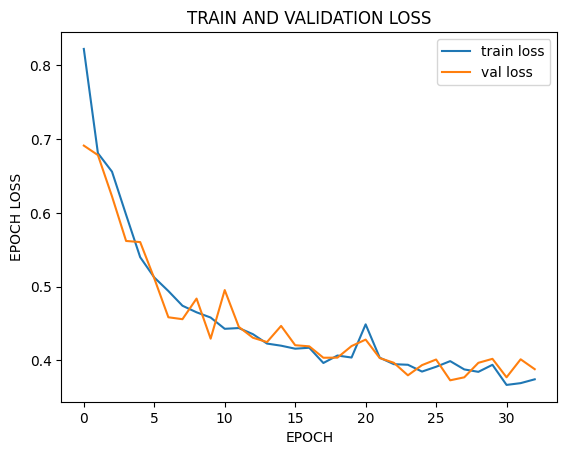

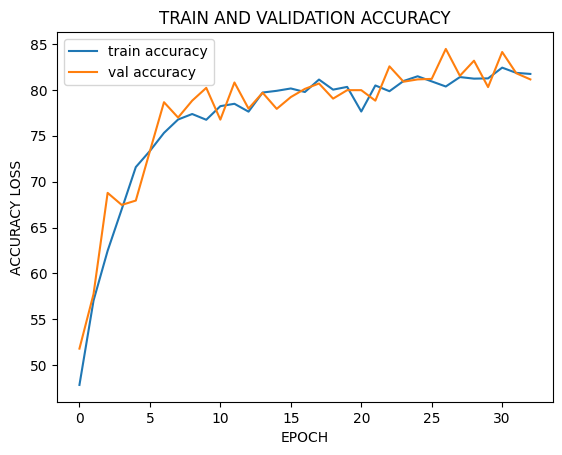

In [274]:
plt.plot(x, label='train loss')
plt.plot(y, label='val loss')
plt.xlabel('EPOCH')
plt.ylabel('EPOCH LOSS')
plt.title('TRAIN AND VALIDATION LOSS')
plt.legend()
plt.show()
plt.plot(m, label='train accuracy')
plt.plot(n, label='val accuracy')
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY LOSS')
plt.title('TRAIN AND VALIDATION ACCURACY')
plt.legend()
plt.show()

In [287]:
test_loss, test_acc = test_step(data_loader=test_dataloader,
                                    model=model,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn,
                                    device=device
                                    )
print(test_loss)
print(test_acc)

   test: 100%|██████████| 16/16 [00:02<00:00,  5.50it/s, train_acc=83, train_loss=0.34]

0.34000924229621887
83.0078125



Classification Report:
              precision    recall  f1-score   support

      benign       0.83      0.78      0.81       269
   malignant       0.76      0.81      0.79       225

    accuracy                           0.80       494
   macro avg       0.80      0.80      0.80       494
weighted avg       0.80      0.80      0.80       494



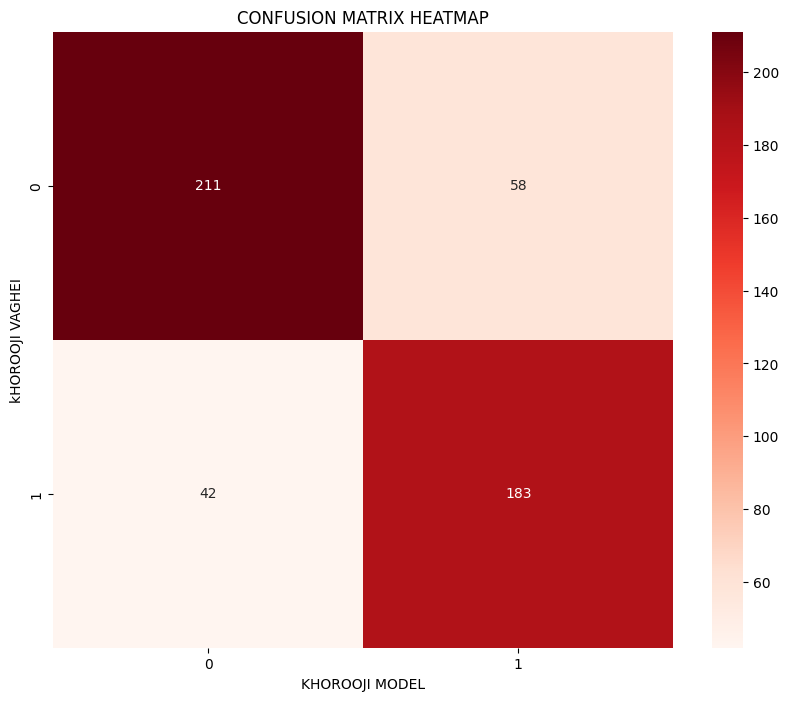

In [288]:
print("\nClassification Report:")
y_true, y_pred = [], []
with torch.no_grad():
    for inputs, labels in val_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

print(classification_report(y_true, y_pred, target_names=train_dataloader.dataset.dataset.classes))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=range(2), yticklabels=range(2))
plt.xlabel('KHOROOJI MODEL')
plt.ylabel('kHOROOJI VAGHEI')
plt.title('CONFUSION MATRIX HEATMAP')
plt.show()


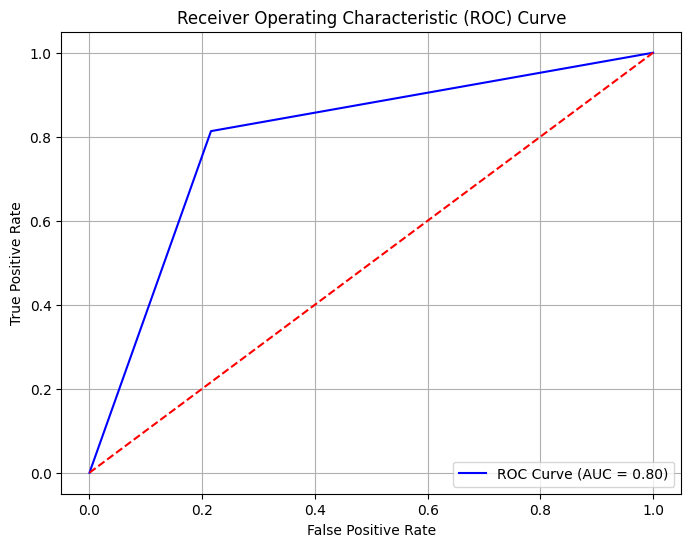

In [289]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()